In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [46]:
sonar=pd.read_csv('sonar.csv', names=range(0,61),header=None)
sonar

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [47]:
dfsonar=pd.DataFrame(data=sonar)

In [48]:
dfsonar.rename(columns={60:'Target'}, inplace=True)
dfsonar

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [49]:
print(sonar.isnull().sum())

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64


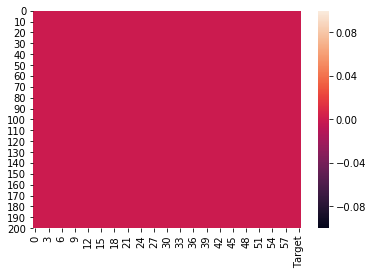

In [50]:
sns.heatmap(dfsonar.isnull())
plt.show()

In [51]:
dfsonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [52]:
dfsonar.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
56        float64
57        float64
58        float64
59        float64
Target     object
Length: 61, dtype: object

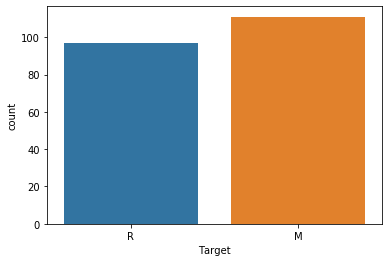

In [53]:
sns.countplot(x="Target",data=dfsonar)
plt.show()

In [54]:
x=dfsonar.iloc[:,0:60]
y=dfsonar[['Target']]

In [55]:
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
x=np.array(x)
x

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [73]:
from sklearn.metrics import f1_score
def maxf1score(cm,x,y):
    maxf1=0
    rs=0
    for rstate in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rstate,test_size=0.20,stratify=y)
        cm.fit(x,y)
        predicty=cm.predict(x_test)
        Newf1=f1_score(y_test,predicty)
        if Newf1>maxf1:
            maxf1=Newf1
            rs=rstate
    print("Maximum f1 score is: ", maxf1,"at random state: ", rs)

In [58]:
# Using Logistic Regression

In [74]:
Logreg=LogisticRegression()
maxf1score(Logreg,x,y)

Maximum f1 score is:  0.9189189189189189 at random state:  66


In [20]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [75]:
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='f1')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 1, 'penalty': 'l1'}


In [83]:
print("Mean f1 score for Logistic Regression after cross validation: ", cross_val_score(Logreg,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Logistic Regression from mean f1 score is : ", cross_val_score(Logreg,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.6109754471310535
Standard deviation for Logistic Regression from mean f1 score is :  0.1219092614949577


In [234]:
# Using Decision Tree Classifier

In [84]:
dtc=DecisionTreeClassifier()
maxf1score(dtc,x,y)

Maximum f1 score is:  1.0 at random state:  42


In [235]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [85]:
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='f1')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [87]:
print("Mean f1 score for Logistic Regression after cross validation: ", cross_val_score(dtc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Logistic Regression from mean f1 score is : ", cross_val_score(dtc,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.5981244230024718
Standard deviation for Logistic Regression from mean f1 score is :  0.09889121524893951


In [239]:
# Using SVC

In [88]:
svc=SVC()
maxf1score(svc,x,y)

Maximum f1 score is:  0.787878787878788 at random state:  93


In [240]:
SVC().get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [91]:
svc=SVC()
hyperparameterssvc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly']}
gridsvc=GridSearchCV(svc, hyperparameterssvc, cv=5, scoring='f1')
gridsvc.fit(x,y)
print(gridsvc.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [92]:
print("Mean f1 score for Logistic Regression after cross validation: ", cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Logistic Regression from mean f1 score is : ", cross_val_score(svc,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.31006043270230915
Standard deviation for Logistic Regression from mean f1 score is :  0.08533675167448813


In [247]:
# Using KNeighborsClassifier

In [93]:
knn=KNeighborsClassifier()
maxf1score(knn,x,y)

Maximum f1 score is:  0.9230769230769231 at random state:  53


In [95]:
knn=KNeighborsClassifier()
k_range = list(range(1,50))
hyperparametersknn=dict(n_neighbors=k_range)
gridknn=GridSearchCV(knn, hyperparametersknn, cv=5, scoring='f1')
gridknn.fit(x,y)
print(gridknn.best_params_)

{'n_neighbors': 3}


In [96]:
print("Mean f1 score for Logistic Regression after cross validation: ", cross_val_score(knn,x,y,cv=5,scoring="f1").mean())
print("Standard deviation for Logistic Regression from mean f1 score is : ", cross_val_score(knn,x,y,cv=5,scoring="f1").std())

Mean f1 score for Logistic Regression after cross validation:  0.5236528644356211
Standard deviation for Logistic Regression from mean f1 score is :  0.10543633866610798


In [251]:
# The above analysis indicates that Logistic regression has the highest f1 score

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=66,test_size=.20,stratify=y)
Logreg.fit(x_train,y_train)
predicty=Logreg.predict(x_test)
print(confusion_matrix(y_test,predicty))
print(classification_report(y_test,predicty))

[[21  1]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.94      0.85      0.89        20

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42



In [98]:
from sklearn.externals import joblib
joblib.dump(knn,'sonar_datset_knn.pkl')

['sonar_datset_knn.pkl']